# Multiple Features Regression

**Extend the previous algorithms to support multiple features.**

### Tools
- Pandas
- Numpy
- matplotlib

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Training
**As in the single feature, we need to predict a value according to dataset but here the prediction has multiple featrures.**

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [215]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

#### Plotting Training Data
Our data is a 2d matrix $X$ with size $M * N$ that is $M$ examples with $N$ features
our matrix is as bellow:

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  


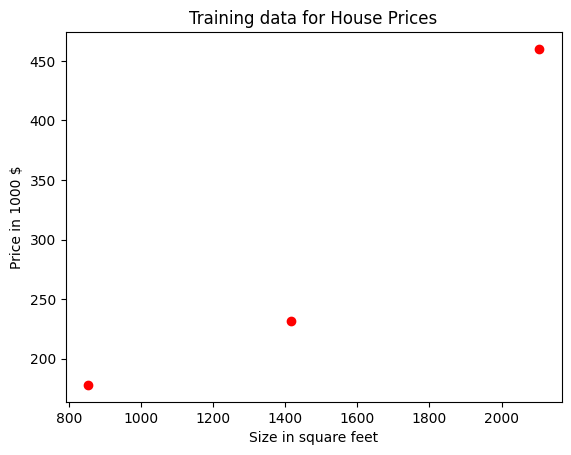

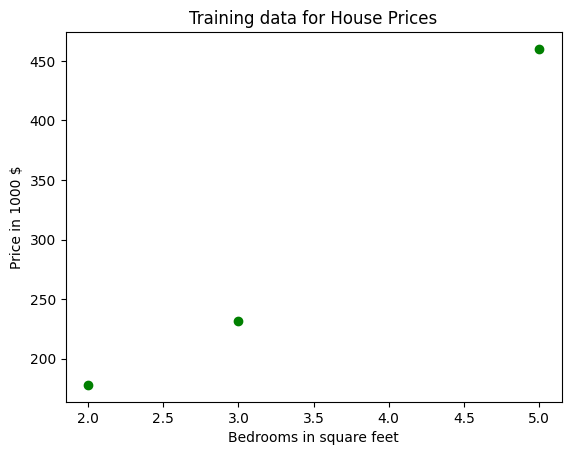

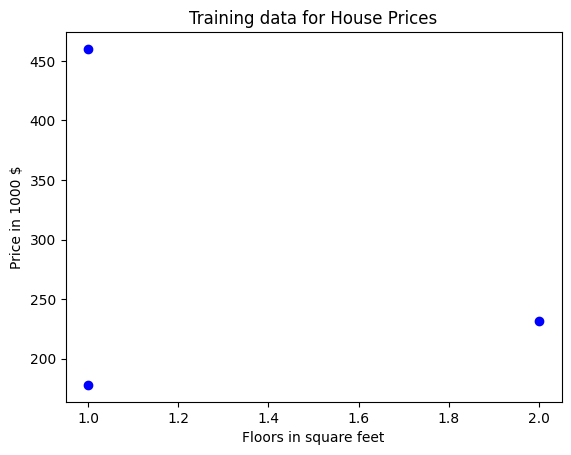

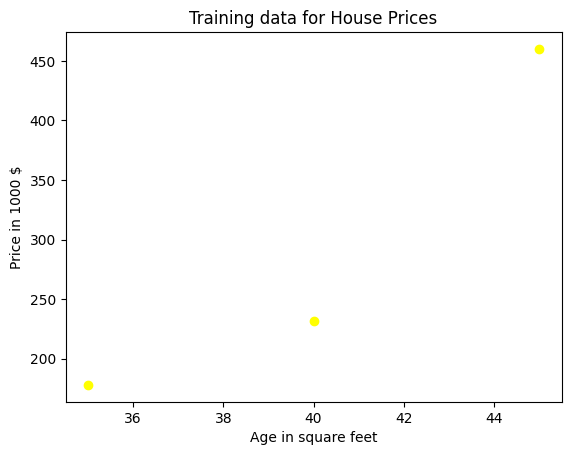

In [216]:
features = ['Size', 'Bedrooms', 'Floors', 'Age']
colors = ['red', 'green', 'blue', 'yellow']
markers = ['o', 'x', 'o', 'x']
for i in range(len(X_train[0])):
    plt.scatter(X_train[:, i], y_train, color = {colors[i]}, marker = 'o', label = {features[i]})
    plt.title('Training data for House Prices')
    plt.ylabel('Price in 1000 $')
    plt.xlabel(f'{features[i]} in square feet')
    plt.show()

## Prediction Model

As **Signle Feature Prediction** every feature of the multiple features has its own $w$ and $b$ is constant for the prediction.

so the prediction model is as following:

- Single Feature Modeling: $$  f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$

- or in vector notation:  $$\newline f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$ 
    
    where $\cdot$ is a vector `dot product` which is done by numpy library as `$np.dot(x,w)$.`

**So we will implement the two methods of modeling**

#### Single Feature Prediction

In [217]:
def single_feature_modeling(x_train, w, b):
    n = x_train.shape[0]
    f_wb = 0
    for i in range(0,n):
        f_wb += w[i] * x_train[i]
    f_wb += b
    return f_wb

#### Vectorization prediction

In [218]:
def vectorized_modeling(x_train, w, b):
    return np.dot(x_train, w) + b

**Let's test our models**

In [219]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
x_test = X_train[0,:]   # test for the first house in the training data

f_wb_single = single_feature_modeling(x_test, w_init, b_init)
print(f'Modeling with single prediction: {f_wb_single}')

f_wb_vectorized = vectorized_modeling(x_test, w_init, b_init)
print(f'Modeling with vectorized prediction: {f_wb_vectorized}')

Modeling with single prediction: 459.9999976194083
Modeling with vectorized prediction: 459.9999976194083


## Cost Function for multiple features

As we know previously, the cost function is a measure of how well is your model.

cost function algorithm for Multiple Features model is as following:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$ 

**Here is the cost function implementation**

In [220]:
def cost_function(y_train, f_wb):
    n = y_train.shape[0]
    cost = 0
    for i in range(0,n):
        cost += (y_train[i] - f_wb[i])**2
    return cost/(2*n)

Let's Test our Code

In [221]:
n = X_train.shape[0]
f_wb = np.zeros(n)

# with single prediction
for i in range(0, n):
    f_wb[i] = single_feature_modeling(X_train[i,:], w_init, b_init)

cost_single = cost_function(y_train,f_wb)
print(f'Cost function when single prediction uesd: {cost_single}')

# with vectorized prediction
for i in range(0, n):
    f_wb[i] = vectorized_modeling(X_train[i,:], w_init, b_init)

cost_vectorized = cost_function(y_train,f_wb)
print(f'Cost function when vectorized prediction used: {cost_vectorized}')

Cost function when single prediction uesd: 1.5578904428966628e-12
Cost function when vectorized prediction used: 1.5578904428966628e-12


## Gradient Descent for multiple features model

As previous, the gradient descent is an algorithm that used to get the best model parameters $w, b$ to minimize the cost function

The Gradient Descent Algorithm for multiple features is as following:

$$\begin{align*}
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \tag{2}  \newline
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{3}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{4}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

We will get Gradient Descent in 3 functions:

- `compute cost`: was implemented in the previous outline (Cost Function).
- `compute gradient` : implements the last 2 equations 3,4.
- `Gradient Descent` : get final parameters w,b from equations 1,2.

**Compute Gradient**

In [222]:
def compute_gradient(x, y, f_wb):
    m,n = x.shape
    dw = np.zeros((n,))
    db = 0.
    
    for i in range(0, m):
        err = f_wb[i] - y[i]
        for j in range(0, n):
            dw[j] = dw[j] + err * x[i,j]
        db = db + err
    dw /= m
    db /= m
    return dw, db

**Gradient Descent Function**

In [223]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    m,n = x.shape
    for i in range(0, num_iters):
        f_wb = np.zeros(m)
        for j in range(0, m):
            f_wb[j] = vectorized_modeling(x[j,:], w, b)
        dw, db = compute_gradient(x, y, f_wb)
        w = w - alpha * dw
        b = b - alpha * db
    return w, b

**Let's test our code**

In [224]:
X = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
Y = np.array([460, 232, 178])
alpha = 5.0e-7
num_iters = 1000
m,n = X_train.shape
w_init = np.zeros(n)
b_init = 0
w_opt, b_opt = gradient_descent(X, Y, w_init, b_init, alpha, num_iters)
print(f'Optimal weights: {w_opt}')
print(f'Optimal bias: {b_opt}')

f_wb = vectorized_modeling(X, w_opt, b_opt)
cost = cost_function(Y, f_wb)
print(f'Cost function with optimal weights and bias: {cost}')

Optimal weights: [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
Optimal bias: -0.002235407530932535
Cost function with optimal weights and bias: 686.7034116665205
